#### Note
* Top-10 locations where the offense was reported in illinois (for 2019): Residence/Home, Highway/Road/Alley/Street/Sidewalk, Parking/Drop Lot/Garage, Department/Discount Store, School-Elementary/Secondary, Restaurant, Convenience Store, Grocery/Supermarket, Grocery/Supermarket

In [54]:
import pandas as pd
import numpy as np
import scipy as sts
import os
import csv
import matplotlib.pyplot as plt

In [55]:
location_19 = "Data/IL2019/NIBRS_LOCATION_TYPE.csv"
location_df19 = pd.read_csv(location_19)
offense_19 = "Data/IL2019/NIBRS_OFFENSE.csv"
offense_df19 = pd.read_csv(offense_19)
merged_2019 = pd.merge(offense_df19, location_df19, on="LOCATION_ID")
merged_2019

,DATA_YEAR,OFFENSE_ID,INCIDENT_ID,OFFENSE_TYPE_ID,ATTEMPT_COMPLETE_FLAG,LOCATION_ID,NUM_PREMISES_ENTERED,METHOD_ENTRY_CODE,LOCATION_CODE,LOCATION_NAME
0,2019,138494615,113389118,51,C,20,NaN,NaN,20,Residence/Home
1,2019,138500320,113383842,39,C,20,NaN,NaN,20,Residence/Home
2,2019,138500319,113383842,16,C,20,NaN,NaN,20,Residence/Home
3,2019,138500318,113383842,28,C,20,NaN,NaN,20,Residence/Home
4,2019,138500343,113389145,51,C,20,NaN,NaN,20,Residence/Home
...,...,...,...,...,...,...,...,...,...,...
15320,2019,131757137,107364847,56,C,32,NaN,NaN,44,Daycare Facility
15321,2019,145117318,119775197,29,C,32,NaN,NaN,44,Daycare Facility
15322,2019,148246416,122506289,51,C,32,NaN,NaN,44,Daycare Facility
15323,2019,143137409,118021938,5,C,16,NaN,NaN,16,Lake/Waterway/Beach


In [56]:
clean_2019 = merged_2019.drop(columns = ['DATA_YEAR',
 'INCIDENT_ID',
 'ATTEMPT_COMPLETE_FLAG',
 'NUM_PREMISES_ENTERED','METHOD_ENTRY_CODE'])
clean_2019

,OFFENSE_ID,OFFENSE_TYPE_ID,LOCATION_ID,LOCATION_CODE,LOCATION_NAME
0,138494615,51,20,20,Residence/Home
1,138500320,39,20,20,Residence/Home
2,138500319,16,20,20,Residence/Home
3,138500318,28,20,20,Residence/Home
4,138500343,51,20,20,Residence/Home
...,...,...,...,...,...
15320,131757137,56,32,44,Daycare Facility
15321,145117318,29,32,44,Daycare Facility
15322,148246416,51,32,44,Daycare Facility
15323,143137409,5,16,16,Lake/Waterway/Beach


In [57]:
location_2019=clean2019['LOCATION_NAME']
location_2019

0             Residence/Home
1             Residence/Home
2             Residence/Home
3             Residence/Home
4             Residence/Home
                ...         
15320       Daycare Facility
15321       Daycare Facility
15322       Daycare Facility
15323    Lake/Waterway/Beach
15324    Lake/Waterway/Beach
Name: LOCATION_NAME, Length: 15325, dtype: object

In [58]:
counts_2019=location_2019.value_counts()
counts_2019

Residence/Home                                   8126
Highway/Road/Alley/Street/Sidewalk               2396
Parking/Drop Lot/Garage                          1002
Service/Gas Station                               567
Department/Discount Store                         522
School-Elementary/Secondary                       355
Restaurant                                        267
Convenience Store                                 230
Grocery/Supermarket                               223
Commercial/Office Building                        201
Specialty Store                                   200
Drug Store/Doctor's Office/Hospital               197
Other/Unknown                                     163
Hotel/Motel/Etc.                                  153
Bar/Nightclub                                     145
Bank/Savings and Loan                             123
Construction Site                                  61
Government/Public Building                         51
Auto Dealership New/Used    

In [59]:
counts_top10=counts_2019.nlargest(10)
counts_top10

Residence/Home                        8126
Highway/Road/Alley/Street/Sidewalk    2396
Parking/Drop Lot/Garage               1002
Service/Gas Station                    567
Department/Discount Store              522
School-Elementary/Secondary            355
Restaurant                             267
Convenience Store                      230
Grocery/Supermarket                    223
Commercial/Office Building             201
Name: LOCATION_NAME, dtype: int64

In [60]:
table=counts_top10.sort_index()
table=pd.DataFrame([table])
table=table.T
table

,LOCATION_NAME
Commercial/Office Building,201
Convenience Store,230
Department/Discount Store,522
Grocery/Supermarket,223
Highway/Road/Alley/Street/Sidewalk,2396
Parking/Drop Lot/Garage,1002
Residence/Home,8126
Restaurant,267
School-Elementary/Secondary,355
Service/Gas Station,567


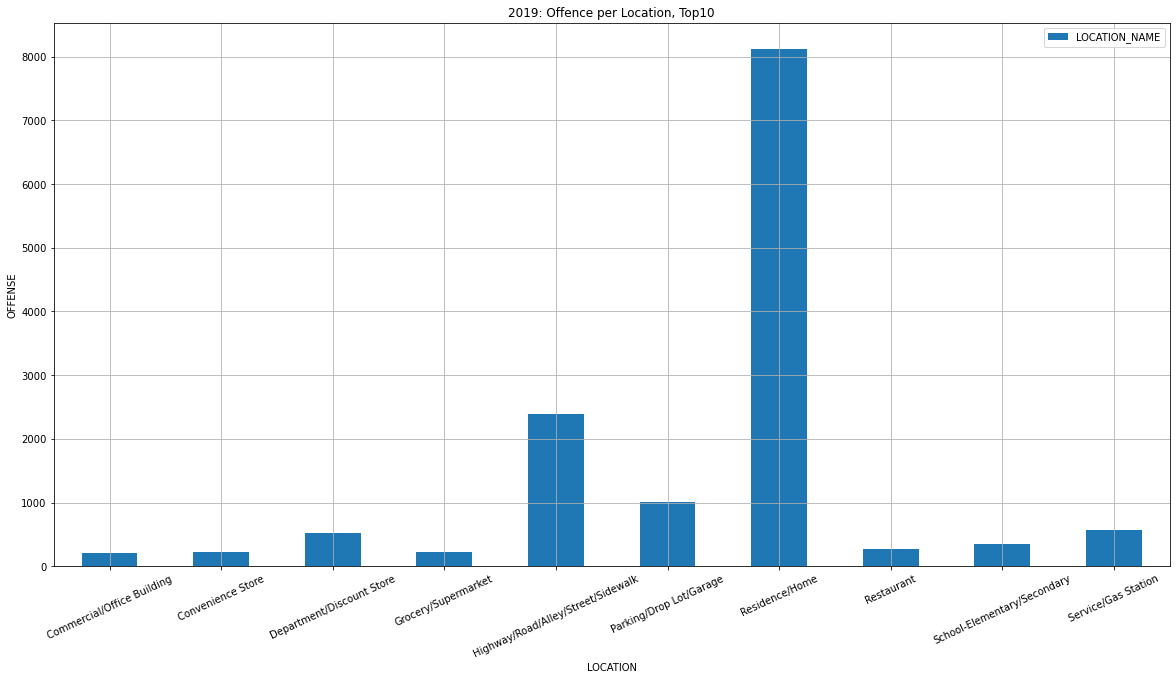

In [61]:
table.plot.bar(figsize=(20, 10));
plt.title('2019: Offence per Location, Top10')
plt.xlabel('LOCATION')
plt.ylabel('OFFENSE')
plt.xticks(rotation=25)
plt.grid()